# 0. Module import

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

# 1. Day-Ahead

# 1.1. Day-Ahead - Importing file 

In [60]:
df_dayahead= pd.read_csv(r"C:\Users\Brianda\OneDrive\Documentos\FH Südwestfalen\Python Project\Day-Ahead Auction\auction_spot_prices_germany_luxembourg_2022.csv",skiprows=1)                      # Reading the CSV file and skipping the first row
df_dayahead.columns = df_dayahead.columns.str.replace('\n', '')
df_dayahead.head(5)

,Delivery day,Hour 1,Hour 2,Hour 3A,Hour 3B,Hour 4,Hour 5,Hour 6,Hour 7,Hour 8,...,Peakload,Night,Off-Peak 1,Business,Offpeak,Morning,High Noon,Afternoon,Evening,Sunpeak
0,31/12/2022,-0.03,-0.07,-0.03,NaN,-0.04,-0.03,-0.02,-0.01,-0.05,...,-1.21,-0.04,-0.04,-1.58,-0.37,0.14,-2.30,-1.24,-0.87,-2.21
1,30/12/2022,11.17,5.09,3.09,NaN,0.65,0.57,4.88,10.93,24.13,...,23.90,4.24,7.56,24.85,5.35,22.96,22.11,26.35,6.65,23.67
2,29/12/2022,-1.01,-1.05,-1.10,NaN,-2.18,-2.05,-0.98,-0.05,0.09,...,19.60,-1.40,-1.04,9.27,7.56,3.75,3.67,26.56,33.06,9.86
3,28/12/2022,40.28,33.13,10.31,NaN,0.05,0.03,0.10,16.97,31.41,...,67.60,13.98,16.54,59.57,24.19,38.81,56.88,79.42,52.87,61.61
4,27/12/2022,23.36,9.98,5.69,NaN,5.00,11.46,19.59,30.42,80.96,...,128.78,12.51,23.31,114.68,54.69,76.84,109.77,147.16,131.91,120.25


# 1.2. Day-Ahead - Filtering the data

In [61]:
df_dayahead = df_dayahead.drop(columns=['Hour 3B'])                                                         # Dropping Hour 3B colum 
df_dayahead = df_dayahead.rename(columns = {'Hour 3A' : 'Hour 3','Delivery day' : 'DeliveryDay'})           # Renaming columns
df_dayahead =  df_dayahead.iloc[:, :25]
df_dayahead['DeliveryDay'] =  pd.to_datetime(df_dayahead['DeliveryDay'])                                    # Convert the "Delivery day" column to datetime
df_dayahead['Month'] = df_dayahead['DeliveryDay'].dt.month
df_dayahead = df_dayahead.loc[(df_dayahead['Month'] == 8)]
df_dayahead = df_dayahead.sort_values(by=['DeliveryDay'])                                                   # Filtering the DataFrame to only include rows where the date is in August
df_dayahead.head(5)                                                                                         # Displaying the first few rows of the filtered dataframe

C:\Users\Brianda\AppData\Local\Temp\ipykernel_22168\2480014574.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_dayahead['DeliveryDay'] =  pd.to_datetime(df_dayahead['DeliveryDay'])                                    # Convert the "Delivery day" column to datetime


,DeliveryDay,Hour 1,Hour 2,Hour 3,Hour 4,Hour 5,Hour 6,Hour 7,Hour 8,Hour 9,...,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24,Month
152,2022-08-01,385.06,344.06,338.81,320.86,329.72,380.00,429.66,467.91,474.90,...,385.09,398.90,437.25,461.06,510.66,530.88,524.33,509.33,469.58,8
151,2022-08-02,440.98,390.10,382.10,359.89,352.69,393.03,457.04,479.90,478.90,...,219.00,274.71,324.11,435.36,499.47,511.07,513.17,484.91,441.26,8
150,2022-08-03,383.95,368.07,340.14,326.30,329.96,368.76,440.47,453.86,444.21,...,291.92,361.59,438.52,500.35,550.06,566.89,560.76,500.02,452.18,8
149,2022-08-04,450.30,414.26,375.07,348.49,345.30,375.07,452.27,480.10,479.79,...,342.64,366.51,416.97,492.73,513.74,504.33,499.83,480.60,424.96,8
148,2022-08-05,406.06,358.18,337.64,339.17,338.52,390.05,449.91,468.00,483.91,...,256.21,252.44,291.18,355.02,419.54,424.89,437.30,429.91,386.55,8


# 1.3. Day-Ahead - Data Transformation

In [62]:
# Transpose the data
dates_repeated = df_dayahead['DeliveryDay'].repeat(24).reset_index(drop=True)           # First column (date) repeated 24 times for each day
hours_repeated = [hour for _ in range(len(df_dayahead)) for hour in range(1, 25)]       # Generate hours from 1 to 24 for each day in df_august
data_flat = df_dayahead.iloc[:, 1:].values.flatten()                                    # Flatten the rest of the data properly
df_dayahead_transpose = pd.melt(df_dayahead,                                            # Create the new DataFrame
                  id_vars=['DeliveryDay', 'Month'], 
                  var_name='Hour', 
                  value_name='IndexPrice')
df_dayahead_transpose['DeliveryDay'] =  pd.to_datetime(df_dayahead_transpose['DeliveryDay'])
df_dayahead_transpose['Hour'] = df_dayahead_transpose['Hour'].str.split(' ').str[1].astype(int)
df_dayahead_transpose.sort_values(by=['DeliveryDay', 'Hour'], inplace=True)
df_dayahead_transpose.head(5)

,DeliveryDay,Month,Hour,IndexPrice
0,2022-08-01,8,1,385.06
31,2022-08-01,8,2,344.06
62,2022-08-01,8,3,338.81
93,2022-08-01,8,4,320.86
124,2022-08-01,8,5,329.72


# 1.4. Day-Ahead - Hourly Profit Calculation

In [63]:
df_dayahead_transpose['Revenue'] = df_dayahead_transpose['IndexPrice']*100
df_dayahead_transpose['Cost'] = 100*0.25
df_dayahead_transpose['Profit'] = df_dayahead_transpose['Revenue'] - df_dayahead_transpose['Cost']
df_dayahead_transpose = df_dayahead_transpose.reset_index(drop=True)
df_dayahead_transpose['IndexHour'] = df_dayahead_transpose.index + 1
DayAhead_hourly = df_dayahead_transpose
DayAhead_hourly.head(5)

,DeliveryDay,Month,Hour,IndexPrice,Revenue,Cost,Profit,IndexHour
0,2022-08-01,8,1,385.06,38506.0,25.0,38481.0,1
1,2022-08-01,8,2,344.06,34406.0,25.0,34381.0,2
2,2022-08-01,8,3,338.81,33881.0,25.0,33856.0,3
3,2022-08-01,8,4,320.86,32086.0,25.0,32061.0,4
4,2022-08-01,8,5,329.72,32972.0,25.0,32947.0,5


# 1.5. Day-Ahead - Daily Profit Calculation

In [64]:
DayAhead_daily = df_dayahead_transpose.groupby('DeliveryDay')['Profit'].sum().reset_index()
DayAhead_daily = DayAhead_daily.rename(columns = {'Profit':'DailyProfit'})
DayAhead_daily.head(5)

,DeliveryDay,DailyProfit
0,2022-08-01,1018492.0
1,2022-08-02,912630.0
2,2022-08-03,922984.0
3,2022-08-04,993383.0
4,2022-08-05,912147.0


# 2. Intraday

# 2.1. Intraday - Import data

In [68]:
path = r'C:\Users\Brianda\OneDrive\Documentos\FH Südwestfalen\Python Project\Intraday Continuous'  # Assign the file path where the CSV files are located to variable "path". The "r" used to treat backslashes (\) as literal characters
frames = []  # Create an empty list named frames, which is used to store each DataFrame read from the CSV files.

for file in os.listdir(path):               # List all files and directories in the specified "path". This loop iterates over each file in the directory specified by "path".
    filepath = os.path.join(path, file)     # Create full file path by concatenating "path" and "file" using os.path.join.
    df = pd.read_csv(filepath, skiprows=1)  # Read the CSV file located at filepath into a DataFrame "df" and skip the first row
    frames.append(df)                       # Append the DataFrame "df" reading from the CSV file to the frames list.

df_intraday = pd.concat(frames)             # Concatenate all DataFrames stored in the frames list into a single DataFrame named "df_intraday" and combine all the data from individual CSV files into one large DataFrame vertically.
df_intraday.head(5)


,IndexName,TimeResolution,DeliveryStart,DeliveryEnd,IndexPrice,Currency,IndexVolume,VolumeUnit
0,IDFULL,60min,2022-07-31T22:00:00Z,2022-07-31T23:00:00Z,379.49,EUR,3532.8,MWH
1,IDFULL,60min,2022-07-31T23:00:00Z,2022-08-01T00:00:00Z,329.64,EUR,3463.0,MWH
2,IDFULL,60min,2022-08-01T00:00:00Z,2022-08-01T01:00:00Z,309.88,EUR,4062.0,MWH
3,IDFULL,60min,2022-08-01T01:00:00Z,2022-08-01T02:00:00Z,279.63,EUR,3899.1,MWH
4,IDFULL,60min,2022-08-01T02:00:00Z,2022-08-01T03:00:00Z,307.02,EUR,4140.2,MWH


# 2.2. Intraday - Data Processing 

In [ ]:
df_intraday.sort_values(by=['DeliveryStart'], ascending=True)                                                                                       # Sort data by Delivery Start      
df_intraday['DeliveryStart'] =  pd.to_datetime(df_intraday['DeliveryStart'])                                                                        # Convert column 'DeliveryStart' to datetime format for  easier filtering of dates
df_intraday['DeliveryStart'] = df_intraday['DeliveryStart'].dt.date                                                                                 # Strip out the time component, leaving only the date
df_intraday['DeliveryEnd'] = pd.to_datetime(df_intraday['DeliveryEnd'])                                                                             # Convert column 'DeliveryEnd' to datetime format for  easier filtering of dates
df_intraday['DeliveryEnd'] = df_intraday['DeliveryEnd'].dt.date                                                                                     # Strip out the time component, leaving only the date
df_intraday['DeliveryStart'] =  pd.to_datetime(df_intraday['DeliveryStart'])                                                                        # Convert column 'DeliveryEnd' to datetime format for  easier filtering of dates
df_intraday['Month'] = df_intraday['DeliveryStart'].dt.month                                                                                        # Pickup the month value as the dataset has July and August, we will fileter later
df_intraday = df_intraday.drop(columns=['Currency' , 'IndexVolume' , 'VolumeUnit'])                                                                 # Remove unused column 'Currency' , 'IndexVolume' , 'VolumeUnit'
df_intraday = df_intraday.loc[(df_intraday['Month'] == 8) & (df_intraday["IndexName"] == "IDFULL") & (df_intraday["TimeResolution"] == "60min")]    # Filter data of August, IDFULL and 60 min.                                                                                 #This step is used to sort the data by delivery start
df_intraday.head(5)

,IndexName,TimeResolution,DeliveryStart,DeliveryEnd,IndexPrice,Month
2,IDFULL,60min,2022-08-01,2022-08-01,309.88,8
3,IDFULL,60min,2022-08-01,2022-08-01,279.63,8
4,IDFULL,60min,2022-08-01,2022-08-01,307.02,8
5,IDFULL,60min,2022-08-01,2022-08-01,333.93,8
6,IDFULL,60min,2022-08-01,2022-08-01,398.87,8


# 2.3. Intraday - Hourly Profit Calculation

In [ ]:
df_intraday['Revenue'] = df_intraday['IndexPrice']*100                                          # Add "Revenue" column and calculate the revenue by multiplying the IndexPrice by 100
df_intraday['Cost'] = 100*0.25                                                                  # Add "Cost" column and calculate the instant cost by multiplying the 0.25 by 100
df_intraday['Profit'] = df_intraday['Revenue'] - df_intraday['Cost']                            # Add "Profit" column and calculate the instant cost by subtracting the "Cost" from the "Revenue"
df_intraday = df_intraday.reset_index(drop=True)                                                # Reset the index of the DataFrame
df_intraday['IndexHour'] = df_intraday.index + 1                                                # Create a new column "IndexHour". It represents the hour of the day in sequential time period 
df_intraday = df_intraday.drop(columns=['IndexName' , 'TimeResolution' , 'DeliveryEnd'])        # Remove unused column 'IndexName' , 'TimeResolution' , 'DeliveryEnd'
Intraday_hourly = df_intraday                                                                   # Rename dataframe for easier reference
Intraday_hourly = Intraday_hourly.rename(columns={'DeliveryStart': 'DeliveryDay'})              # Rename column "DeliveryStart" in dataframe to "DeliveryDay" to ensure the consistence between 2 dataframes of 2 markets
Intraday_hourly.head(5)

,DeliveryDay,IndexPrice,Month,Revenue,Cost,Profit,IndexHour
0,2022-08-01,309.88,8,30988.0,25.0,30963.0,1
1,2022-08-01,279.63,8,27963.0,25.0,27938.0,2
2,2022-08-01,307.02,8,30702.0,25.0,30677.0,3
3,2022-08-01,333.93,8,33393.0,25.0,33368.0,4
4,2022-08-01,398.87,8,39887.0,25.0,39862.0,5


# 2.4. Intraday - Daily Profit Calculation

In [ ]:
Intraday_daily = Intraday_hourly.groupby('DeliveryDay')['Profit'].sum().reset_index()       # Calculate profit for each day.
Intraday_daily = Intraday_daily.rename(columns={ 'Profit':'DailyProfit'})                   # Rename the column "Profit" to "DailyProfit"
Intraday_daily.head(5)

,DeliveryDay,DailyProfit
0,2022-08-01,986774.0
1,2022-08-02,802266.0
2,2022-08-03,1033626.0
3,2022-08-04,1053186.0
4,2022-08-05,879512.0


# 3. Reporting

# 3.1. Reporting (Hourly Profit Comparison)

<function matplotlib.pyplot.show(close=None, block=None)>

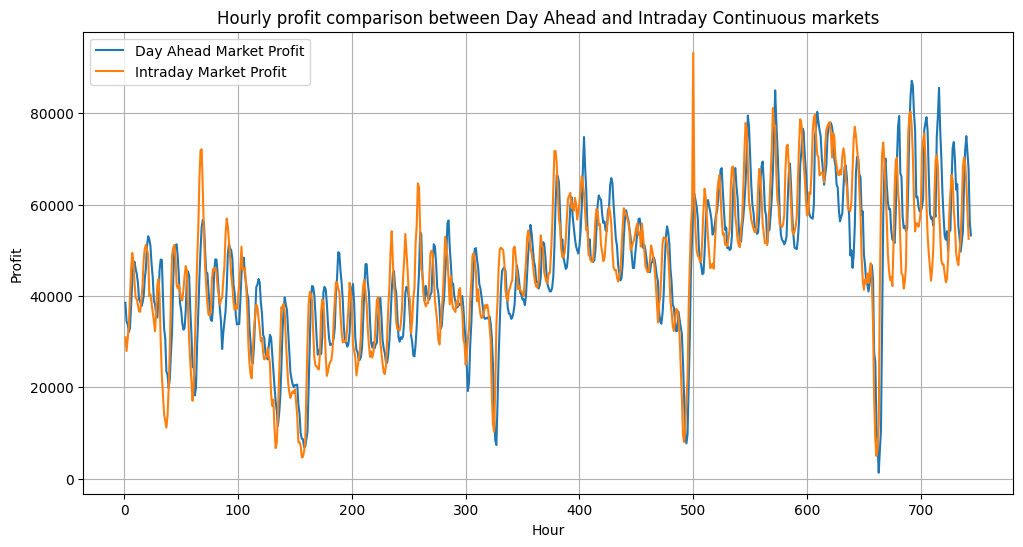

In [ ]:
plt.figure(figsize=(12, 6))                                                                                     #Creating a figure with a specific size

plt.plot((DayAhead_hourly["IndexHour"]), DayAhead_hourly["Profit"], label = "Day Ahead Market Profit")          #Plotting the profit data for the Day Ahead Market
plt.plot((Intraday_hourly["IndexHour"]), Intraday_hourly["Profit"], label = "Intraday Market Profit")           #Plotting the profit data for the Intraday Market 
plt.title("Hourly profit comparison between Day Ahead and Intraday Continuous markets")                         #Adding a title to the plot
plt.xlabel("Hour")                                                                                              #Labeling the x-axis
plt.ylabel("Profit")                                                                                            #Labeling the y-axis

plt.legend()                                                                                                    #Adding a legend to distinguish between Day Ahead and Intraday profits
plt.grid(True)                                                                                                  #Displaying grid lines on the plot
plt.show                                                                                                        #Showing the plot

# 3.2. Reporting (Daily Profit Comparison)

<function matplotlib.pyplot.show(close=None, block=None)>

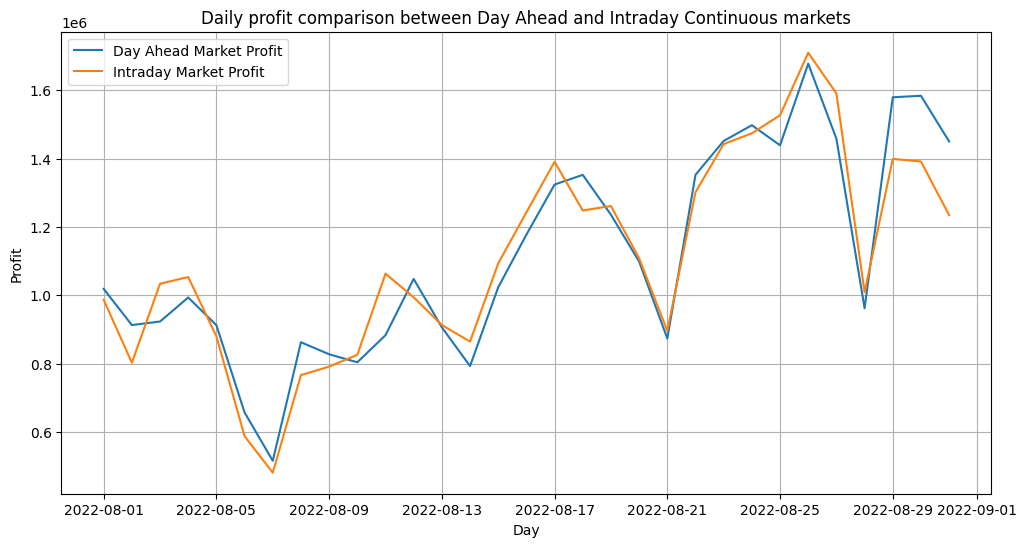

In [ ]:
plt.figure(figsize=(12, 6))                                                                                     #Creating a figure with a specific size 

plt.plot((DayAhead_daily["DeliveryDay"]), DayAhead_daily["DailyProfit"], label = "Day Ahead Market Profit")     #Plotting the daily profit data for the Day Ahead Market
plt.plot((Intraday_daily["DeliveryDay"]), Intraday_daily["DailyProfit"], label = "Intraday Market Profit")      #Plotting the daily profit data for the Intraday Market
plt.title("Daily profit comparison between Day Ahead and Intraday Continuous markets")                          #Adding a title to the plot
plt.xlabel("Day")                                                                                               #Labeling the x-axis
plt.ylabel("Profit")                                                                                            #Labeling the y-axis

plt.legend()                                                                                                    #Adding a legend to distinguish between Day Ahead and Intraday profits
plt.grid(True)                                                                                                  #Displaying grid lines on the plot
plt.show                                                                                                        #Showing the plot

# 3.3. Reporting Based on Users' Needs

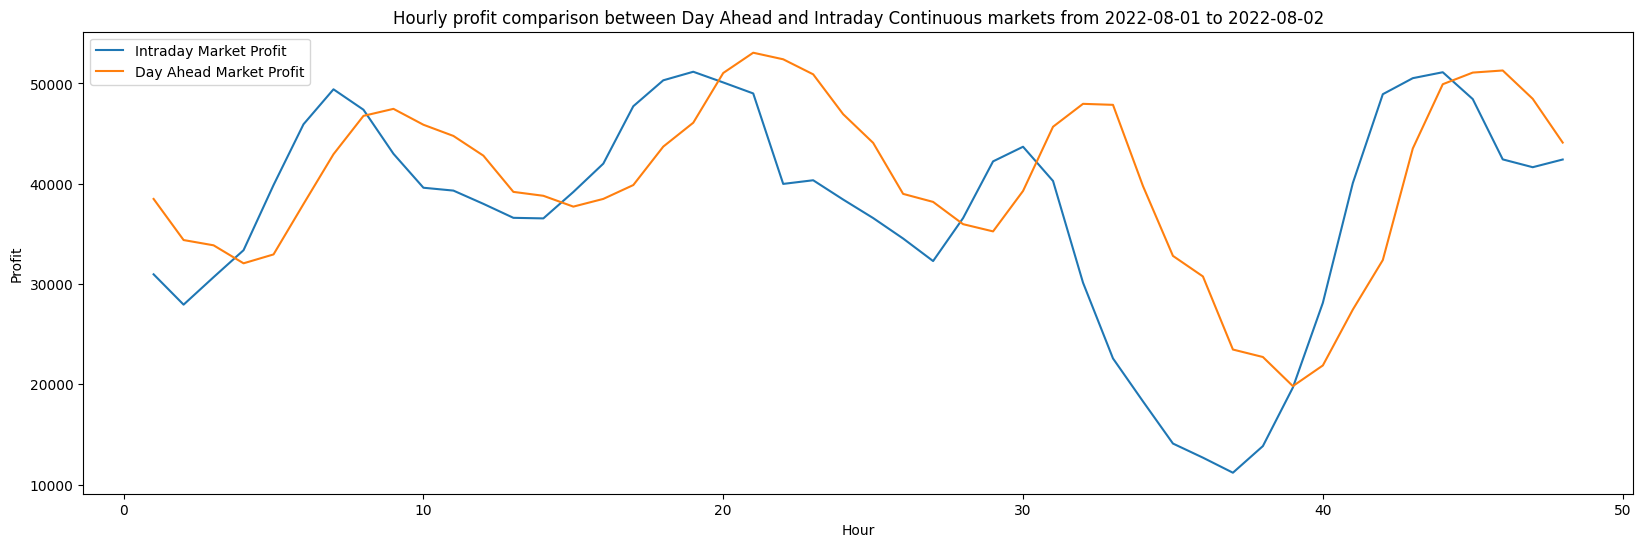

In [ ]:
# Conditional block based on user's input
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD):")
resolution = input("Enter the resolution (hourly/daily): ")

if resolution == "hourly":
    # Filter data for hourly resolution
    Intraday_hourly_specific = Intraday_hourly[(Intraday_hourly["DeliveryDay"] >= start_date) & (Intraday_hourly["DeliveryDay"] <= end_date)]
    DayAhead_hourly_specific = DayAhead_hourly[(DayAhead_hourly["DeliveryDay"] >= start_date) & (DayAhead_hourly["DeliveryDay"] <= end_date)]

    # Plotting for hourly resolution
    plt.figure(figsize=(20, 6))
    plt.plot(Intraday_hourly_specific["IndexHour"], Intraday_hourly_specific["Profit"], label = "Intraday Market Profit")
    plt.plot(DayAhead_hourly_specific["IndexHour"], DayAhead_hourly_specific["Profit"], label = "Day Ahead Market Profit")
    plt.title(f"Hourly profit comparison between Day Ahead and Intraday Continuous markets from {start_date} to {end_date}")
    plt.xlabel("Hour")
    plt.ylabel("Profit")
    plt.legend()

elif resolution == "daily":
    # Filter data for daily resolution
    Intraday_daily_specific = Intraday_daily[(Intraday_daily["DeliveryDay"] >= start_date) & (Intraday_daily["DeliveryDay"] <= end_date)]
    DayAhead_daily_specific = DayAhead_daily[(DayAhead_daily["DeliveryDay"] >= start_date) & (DayAhead_daily["DeliveryDay"] <= end_date)]
    
    # Plotting for the daily resolution
    plt.figure(figsize=(15, 6))
    plt.plot(Intraday_daily_specific["DeliveryDay"], Intraday_daily_specific["DailyProfit"], label = "Intraday Market Profit")
    plt.plot(DayAhead_daily_specific["DeliveryDay"], DayAhead_daily_specific["DailyProfit"], label = "Day Ahead Market Profit")
    plt.title(f"Daily profit comparison between Day Ahead and Intraday Continuous markets from {start_date} to {end_date}")
    plt.xlabel("Day")
    plt.ylabel("Profit")
    plt.legend()
else:
    # Handle invalid resolution input
    print("Invalid resolution. Please enter 'hourly' or 'daily'.")